In [1]:
import tensorflow as tf

In [3]:
import random 
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


Label:3


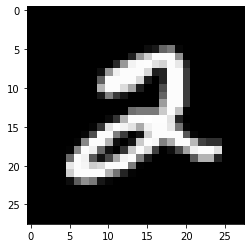

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label:{}".format(y_train[22000]))
plt.imshow(x_train[5],cmap='gray')

In [18]:
# Reshaping independent variable
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [19]:
x_train.shape[0]

60000

In [21]:
x_train.shape[1]

28

In [22]:
x_train.shape[2]

28

In [23]:
x_train.shape[3]

1

In [25]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [26]:
#Normalising the independent variable of the image
x_train=x_train/255
x_test=x_test/255

In [27]:
x_train.max()

1.0

In [28]:
x_test.max()

1.0

In [29]:
x_test.min()

0.0

In [30]:
#One hot encoding of image labels/dependent variable
from tensorflow.keras.utils import to_categorical

In [31]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [32]:
print(y_train.shape)

(60000, 10)


In [33]:
print(y_test.shape)

(10000, 10)


In [34]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
##ANN
#import sequential - used to create stack of layers
from tensorflow.keras.models import Sequential
#import dense to create hidden neuron and later on flatten it.
from tensorflow.keras.layers import Flatten,Dense


In [41]:
from matplotlib.cbook import flatten
#ANN model definition
model=Sequential()
#flatten
model.add(Flatten())
#hidden layer
model.add(Dense(784,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))

In [42]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
#Train the model/fit the model
model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1905 - accuracy: 0.9429 - val_loss: 0.0945 - val_accuracy: 0.9707
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0793 - val_accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0758 - val_accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0342 - accuracy: 0.9888 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0746 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0728 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0804 - val_ac

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0828 - accuracy: 0.9805


[0.08282989263534546, 0.9804999828338623]